In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/goldstock.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)
print(data.head())
data = data.sort_values(by='Date')
features = ['Close', 'Volume', 'Open', 'High', 'Low']
data['Date'] = pd.to_datetime(data['Date'])
print(data.dtypes)
print(data.describe())

         Date   Close    Volume    Open    High     Low
0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1
Date      datetime64[ns]
Close            float64
Volume           float64
Open             float64
High             float64
Low              float64
dtype: object
             Close         Volume         Open         High          Low
count  2511.000000    2511.000000  2511.000000  2511.000000  2511.000000
mean   1498.726085  185970.770609  1498.725528  1508.451454  1488.869932
std     298.824811   97600.769382   299.118187   301.262244   296.417703
min    1049.600000       1.000000  1051.500000  1062.700000  1045.400000
25%    1249.850000  126693.500000  1249.500000  1257.300000  1242.350000
50%    1332.800000  175421.000000  1334.000000  1342.400000  1

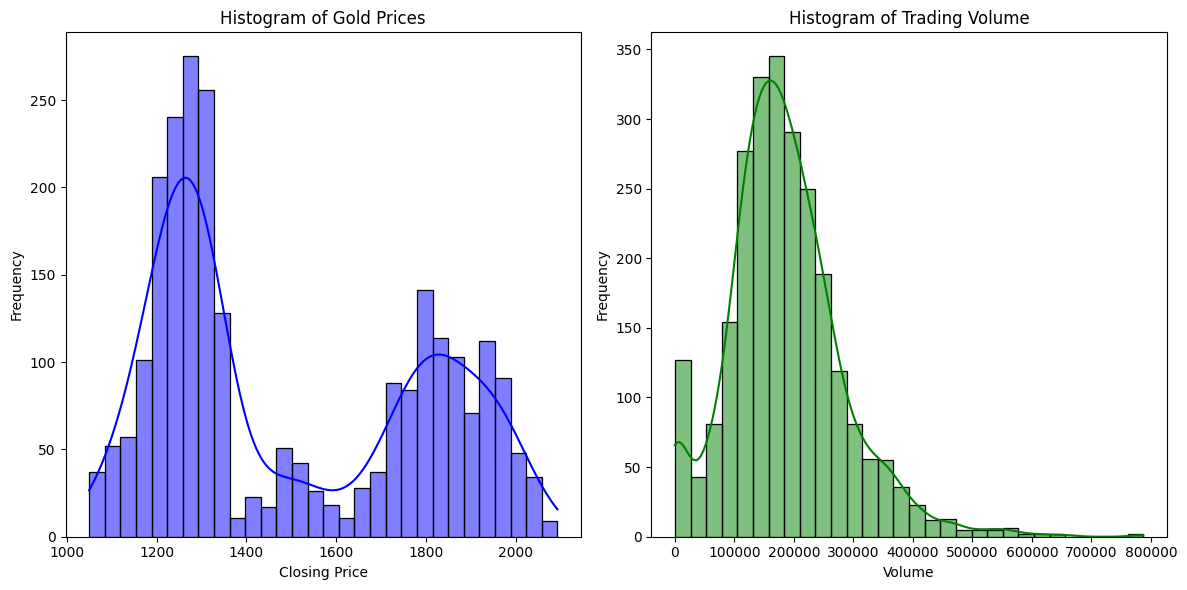

In [ ]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Close'], bins=30, color='blue', kde=True)
plt.title('Histogram of Gold Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(data['Volume'], bins=30, color='green', kde=True)
plt.title('Histogram of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

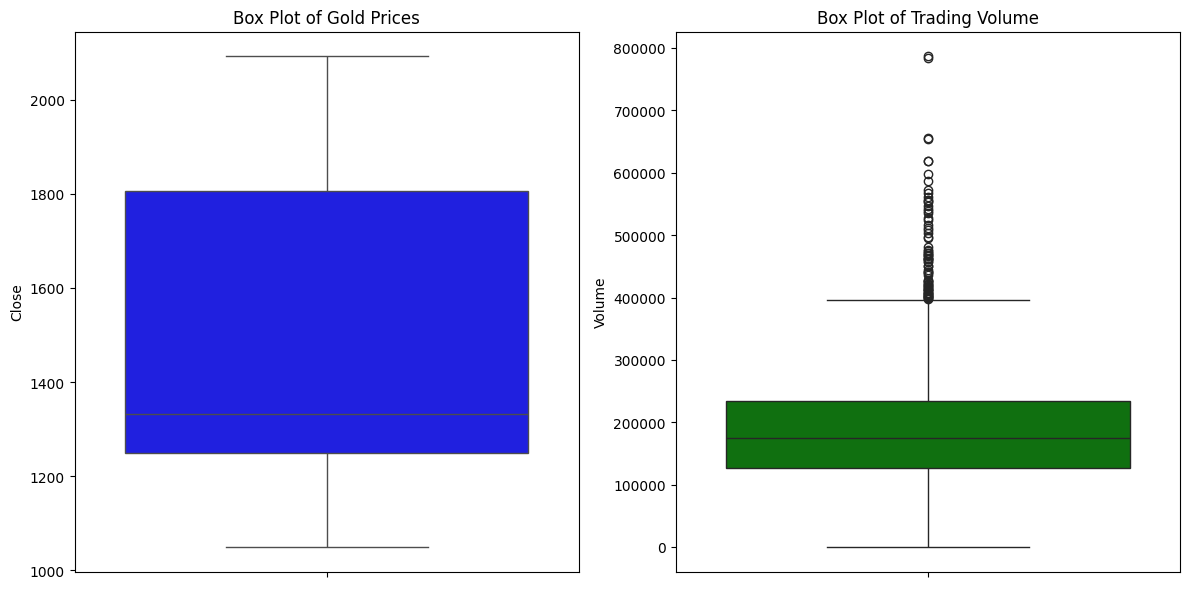

In [ ]:
# Box Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Close'], color='blue')
plt.title('Box Plot of Gold Prices')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Volume'], color='green')
plt.title('Box Plot of Trading Volume')

plt.tight_layout()
plt.show()

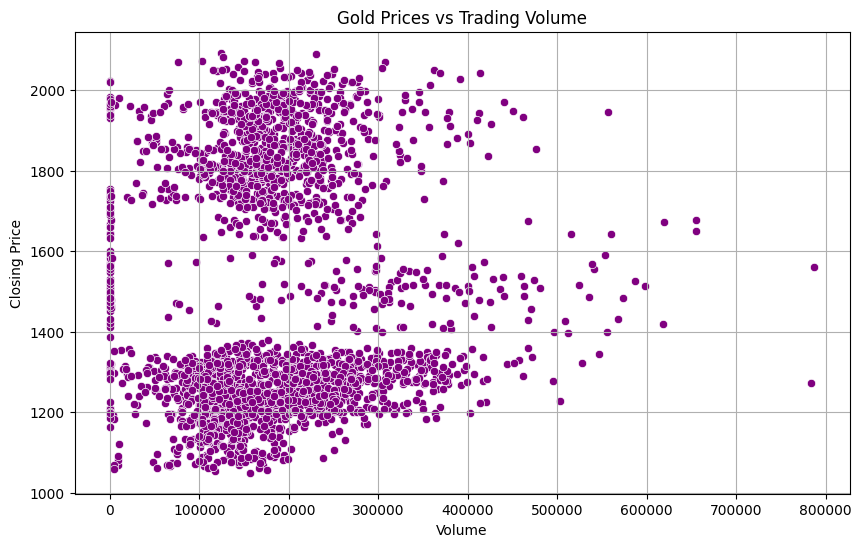

In [ ]:
# Scatter Plot: Gold Prices vs Trading Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Volume'], y=data['Close'], color='purple')
plt.title('Gold Prices vs Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [ ]:
# Calculate Pearson correlation coefficient
correlation = data['Close'].corr(data['Volume'])
print("Pearson Correlation Coefficient between Gold Prices and Trading Volume:", correlation)

Pearson Correlation Coefficient between Gold Prices and Trading Volume: 0.0228351056131814


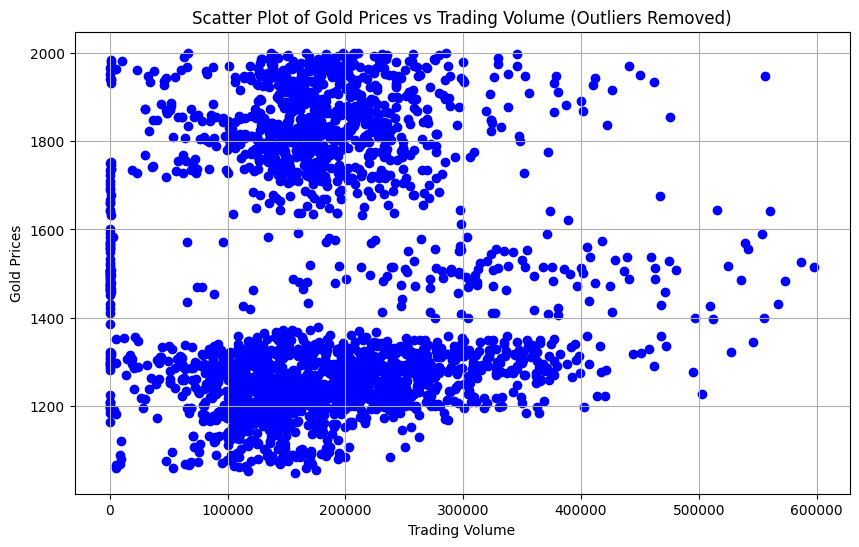

In [ ]:
# Define thresholds for outlier removal
volume_threshold = 600000
close_threshold = 2000

data_cleaned = data[(data['Volume'] < volume_threshold) & (data['Close'] < close_threshold)]

# Visualize the cleaned data
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Volume'], data_cleaned['Close'], color='blue')
plt.title('Scatter Plot of Gold Prices vs Trading Volume (Outliers Removed)')
plt.xlabel('Trading Volume')
plt.ylabel('Gold Prices')
plt.grid(True)
plt.show()


In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

y = data['Close']
model = auto_arima(y, seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20572.784, Time=6.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20580.145, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20578.523, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20578.503, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20579.316, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20581.081, Time=3.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20580.750, Time=6.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=20574.256, Time=13.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=20574.485, Time=12.63 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20580.506, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=20580.790, Time=2.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=20580.525, Time=2.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=20574.174, Time=8.98 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=20571.751, Time=2.53 sec
 ARIMA(1,1,2)(0,0

In [ ]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Close'], order=(2,1,2))
fitted_model = model.fit()
forecast_values = fitted_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(forecast_values)

502    1826.090266
501    1821.645292
500    1817.506179
499    1810.970615
498    1845.989481
          ...     
4      2021.812000
3      2048.862128
2      2031.121452
1      2008.607199
0      2018.068288
Name: predicted_mean, Length: 503, dtype: float64


In [ ]:
forecast_values_10_days = fitted_model.forecast(steps=10)
print("future values for nect 10 days")
print(forecast_values_10_days)

future values for nect 10 days
2511    2031.591392
2512    2031.807349
2513    2029.275705
2514    2032.451296
2515    2030.680706
2516    2029.941345
2517    2032.663484
2518    2029.745327
2519    2030.985059
2520    2032.182663
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_data['Close'], forecast_values)
mse = mean_squared_error(test_data['Close'], forecast_values)
rmse = np.sqrt(mse)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(test_data['Close'], forecast_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 12.891841265069548
Mean Squared Error (MSE): 300.3265662730807
Root Mean Squared Error (RMSE): 17.32993266787499
Mean Absolute Percentage Error (MAPE): 0.683947196110226


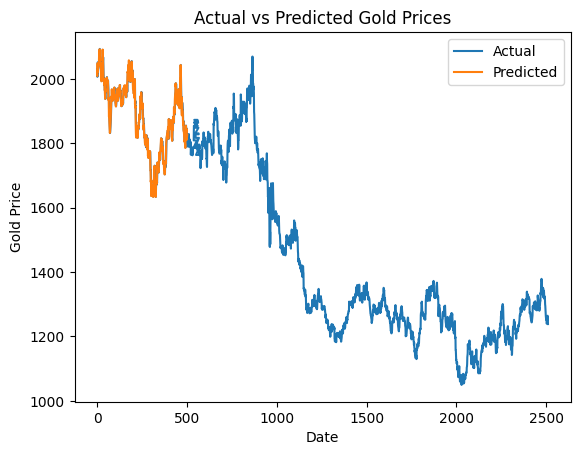

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data['Close'], label='Actual')
plt.plot(forecast_values, label='Predicted')

plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()

plt.show()